In [1]:
#데이터셋 불러오기
import pandas as pd
import numpy as np
import re

data_df = pd.read_excel("/content/drive/MyDrive/졸업논문 데이터 분석/dataset.xlsx")

display(data_df)

,기사 작성일,기사 제목,기사 url,기사 내용,언론사
0,13 ottobre 2021,"SQUID GAME SORPASSA BRIDGERTON, SU NETFLIX È I...",https://www.ansa.it/canale_lifestyle/notizie/t...,"Squid Game il sorpasso: la serie sudcoreana, v...",ansa
1,25 novembre 2021,"Contrabbanda Squid Game in Nord Corea, condann...",https://www.ansa.it/sito/notizie/mondo/2021/11...,"(ANSA) - NEW YORK, 25 NOV - Condannato a morte...",ansa
2,30 dicembre 2021,"Squid Game, trattativa con Netflix per la terz...",https://www.ansa.it/sito/notizie/cultura/tv/20...,"(ANSA) - NEW YORK, 30 DIC - Si parla già di un...",ansa
3,27 novembre 2021,"Contrabbanda Squid Game in Nord Corea, student...",https://www.ansa.it/sito/notizie/mondo/2021/11...,Uno studente è stato condannato a morte per av...,ansa
4,10 ottobre 2021,"Squid game, serie sudcoreana hit globale di Ne...",https://www.ansa.it/sito/notizie/cultura/tv/20...,"Viene da 10 anni di rifiuti, per una sceneggia...",ansa
...,...,...,...,...,...
69,22 OTTOBRE 2021,Hanno tutti ragione | L'osceno Squid Game degl...,https://www.repubblica.it/politica/2021/10/22/...,Il proporzionale ha goduto per anni in Italia ...,la repubblica
70,21 ottobre 2021,I teenager del K pop in coda all'Esquilino col...,https://ricerca.repubblica.it/repubblica/archi...,di Laura Mancini Via dello Statuto ospita da s...,la repubblica
71,07 OTTOBRE 2021,"Squid Game', il futuro delle serie tv parla co...",https://www.repubblica.it/serietv/netflix/2021...,"I nove episodi, disponibili su Netflix in ling...",la repubblica
72,10 maggio 2021,Vincenzo e il piccione coreano,https://ricerca.repubblica.it/repubblica/archi...,Si chiama Vincenzo Cassano ed è il protagonist...,la repubblica


In [2]:
#중복된 데이터 제거
print(f"중복 리뷰 제거 전 리뷰 개수: {data_df.shape[0]}")
data_df.drop_duplicates(["기사 제목"], keep="last") # 
print(f"중복 리뷰 제거 후 리뷰 개수: {data_df.shape[0]}")

# 리뷰 내용이 결측치인 행 제거
print(f"결측치 제거 전 리뷰 개수: {data_df.shape[0]}")
data_df = data_df.dropna(axis=0, how="any")
print(f"결측치 제거 후 리뷰 개수: {data_df.shape[0]}")

중복 리뷰 제거 전 리뷰 개수: 74
중복 리뷰 제거 후 리뷰 개수: 74
결측치 제거 전 리뷰 개수: 74
결측치 제거 후 리뷰 개수: 74


In [3]:
#텍스트 전처리 함수 선언
def preprocess_text(text):
  ##텍스트 형태의 데이터가 float으로 불러와지는 경우를 방지하기 위해 명시적 형변환
  text = str(text)

  #개행문자 제거
  text.replace("\n", " ")

  #대소문자->소문자로 통일
  text = text.lower()

  return text if text else None


#문자열 중간 다중 공백 제거
def del_space(text):
  text = ' '.join(text.split())
  return text

In [4]:
data_df["기사 내용"].head()

0    Squid Game il sorpasso: la serie sudcoreana, v...
1    (ANSA) - NEW YORK, 25 NOV - Condannato a morte...
2    (ANSA) - NEW YORK, 30 DIC - Si parla già di un...
3    Uno studente è stato condannato a morte per av...
4    Viene da 10 anni di rifiuti, per una sceneggia...
Name: 기사 내용, dtype: object

In [5]:
#특수문자 제거 -> 공백으로 치환됨
data_df["기사 내용"] = data_df["기사 내용"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

data_df["기사 내용"].head()

0    Squid Game il sorpasso  la serie sudcoreana  v...
1     ANSA    NEW YORK  25 NOV   Condannato a morte...
2     ANSA    NEW YORK  30 DIC   Si parla già di un...
3    Uno studente è stato condannato a morte per av...
4    Viene da 10 anni di rifiuti  per una sceneggia...
Name: 기사 내용, dtype: object

In [6]:
#텍스트 전처리 함수 preprocess_text() 호출
data_df["기사 내용"] = data_df[["기사 내용"]].apply(lambda x: preprocess_text(x["기사 내용"]), axis=1)

data_df["기사 내용"].head()

0    squid game il sorpasso  la serie sudcoreana  v...
1     ansa    new york  25 nov   condannato a morte...
2     ansa    new york  30 dic   si parla già di un...
3    uno studente è stato condannato a morte per av...
4    viene da 10 anni di rifiuti  per una sceneggia...
Name: 기사 내용, dtype: object

In [7]:
#특수문자를 공백으로 치환하며 생긴 문자열 중간 다중 공백 제거 (del_space()함수 호출)
data_df["기사 내용"] = data_df[["기사 내용"]].apply(lambda x: del_space(x["기사 내용"]), axis=1)

data_df["기사 내용"].head()

0    squid game il sorpasso la serie sudcoreana ver...
1    ansa new york 25 nov condannato a morte per av...
2    ansa new york 30 dic si parla già di un terza ...
3    uno studente è stato condannato a morte per av...
4    viene da 10 anni di rifiuti per una sceneggiat...
Name: 기사 내용, dtype: object

In [8]:
#불용어 제외하기 전 빈도분석 결과
from collections import Counter

result = " ".join(data_df["기사 내용"].tolist())
result_counter = Counter(result.split(" "))

display(result_counter.most_common(20))

[('di', 1210),
 ('e', 816),
 ('la', 669),
 ('che', 661),
 ('il', 598),
 ('in', 559),
 ('un', 498),
 ('a', 498),
 ('è', 469),
 ('per', 397),
 ('i', 346),
 ('una', 335),
 ('del', 286),
 ('con', 281),
 ('serie', 256),
 ('non', 255),
 ('l', 243),
 ('della', 240),
 ('ha', 235),
 ('da', 230)]

In [9]:
#불용어 다운로드를 위한 패키지 다운로드
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_ita = set(stopwords.words("italian"))
print(stop_ita)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'faremo', 'lei', 'tutti', 'nostri', 'anche', 'dallo', 'nei', 'voi', 'era', 'fossimo', 'farei', 'sarei', 'avresti', 'stavate', 'quella', 'sarai', 'staremmo', 'quanti', 'è', 'vostre', 'suo', 'foste', 'ho', 'sull', 'nel', 'sulle', 'furono', 'nell', 'questa', 'fanno', 'tuo', 'avrai', 'eravamo', 'coi', 'quale', 'dalla', 'non', 'facemmo', 'fui', 'miei', 'sullo', 'facevo', 'ci', 'stiate', 'facevate', 'starò', 'mia', 'faceste', 'c', 'agli', 'gli', 'più', 'con', 'suoi', 'abbia', 'sarebbe', 'stavamo', 'avevano', 'facciate', 'stetti', 'dai', 'avuto', 'stanno', 'avevamo', 'ne', 'quanto', 'avrei', 'saremo', 'degli', 'lo', 'avrete', 'saresti', 'stessero', 'abbiano', 'sto', 'sui', 'stava', 'avranno', 'fummo', 'fossero', 'farebbero', 'agl', 'fece', 'al', 'sarebbero', 'farò', 'dell', 'facevano', 'facessi', 'del', 'stiamo', 'avendo', 'stavano', 'alla', 'una', 'e', 'ai', 'sulla', 'avute

In [10]:
#spacy 패키지를 사용하기 위한 모듈 import
import spacy
from spacy.lang.it.examples import sentences
!python -m spacy download it_core_news_sm

     |████████████████████████████████| 14.5 MB 5.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('it_core_news_sm')


In [11]:
print(spacy.__version__)
nlp = spacy.load('it_core_news_sm')

2.2.4


In [13]:
#토큰화
def text_tokenizer(data):
  doc = nlp(data)
  tokens = []
  for token in doc:
      tokens.append(token.text)
  return tokens

tokenized = []
for elem in range(len(data_df)):
  tokenized.append(text_tokenizer(data_df["기사 내용"][elem]))
print(tokenized)

[['squid', 'game', 'il', 'sorpasso', 'la', 'serie', 'sudcoreana', 'vero', 'e', 'proprio', 'fenomeno', 'cult', 'già', 'oltre', 'i', 'confini', 'asiatici', 'è', 'diventato', 'il', 'lancio', 'più', 'visto', 'di', 'sempre', 'su', 'netflix', 'superando', 'il', 'precedente', 'record', 'di', 'bridgerton', 'ha', 'attirato', '111', 'milioni', 'di', 'fan', 'dal', 'suo', 'debutto', 'meno', 'di', 'quattro', 'settimane', 'fa', 'come', 'confermato', 'dal', 'servizio', 'di', 'streaming', 'per', 'il', 'dramma', 'distopico', 'un', 'successo', 'virale', 'globale', 'senza', 'precedenti', 'la', 'serie', 'immagina', 'un', 'mondo', 'macabro', 'in', 'cui', 'le', 'persone', 'emarginate', 'sono', 'messe', 'l', 'una', 'contro', 'l', 'altra', 'nei', 'tradizionali', 'giochi', 'per', 'bambini', 'mentre', 'il', 'vincitore', 'può', 'guadagnare', 'milioni', 'in', 'contanti', 'i', 'giocatori', 'perdenti', 'vengono', 'sterminati', 'diffuso', 'in', 'tutto', 'il', 'mondo', 'tramite', 'il', 'passaparola', 'in', 'particola

In [14]:
import collections

#표제어 추출(ex. immagina -> immaginare)
def text_lemmatizer(data):
  doc = nlp(data)
  tokens = []
  for token in doc:
      tokens.append(token.lemma_)
  return tokens

  #리스트에서 불용어를 제외
  # result = []
  # for w in tokens:
  #   if w not in stop_ita:
  #     result.append(w)
  # return result

lemmartized = []
for elem in range(len(data_df)):
  lemmartized.append(text_lemmatizer(data_df["기사 내용"][elem]))

#print(lemmartized)

#2차원 리스트를 1차원 리스트로 변환
result = sum(lemmartized, [])

#단어들의 개수를 count
counts = collections.Counter(result)

#print(counts)

#가장 많이 등장한 상위 200개 단어와 그 빈도수를 출력
display(counts.most_common(200))

[('di', 1210),
 ('il', 1134),
 ('la', 888),
 ('essere', 880),
 ('e', 816),
 ('che', 661),
 ('in', 559),
 ('un', 541),
 ('a', 498),
 ('avere', 472),
 ('per', 397),
 ('del', 347),
 ('una', 335),
 ('della', 329),
 ('con', 281),
 ('molto', 270),
 ('serio', 259),
 ('non', 255),
 ('al', 247),
 ('l', 243),
 ('da', 230),
 ('si', 226),
 ('alla', 173),
 ('game', 167),
 ('fare', 162),
 ('nel', 158),
 ('ma', 157),
 ('squid', 154),
 ('questo', 144),
 ('come', 138),
 ('stare', 137),
 ('anche', 131),
 ('tutto', 127),
 ('anno', 121),
 ('coreano', 116),
 ('nella', 114),
 ('dio', 109),
 ('netflix', 106),
 ('suo', 99),
 ('su', 97),
 ('giocare', 97),
 ('potere', 91),
 ('primo', 91),
 ('se', 91),
 ('film', 86),
 ('dalla', 86),
 ('tra', 85),
 ('perché', 80),
 ('quello', 80),
 ('altro', 78),
 ('dal', 77),
 ('sul', 77),
 ('cui', 68),
 ('nuovo', 68),
 ('o', 66),
 ('sempre', 65),
 ('corea', 65),
 ('dell', 65),
 ('mondare', 64),
 ('milione', 61),
 ('tv', 61),
 ('succedere', 58),
 ('storia', 58),
 ('bambino', 55)

In [19]:
#nltk에서 지원하는 이탈리아어 불용어 사용
stop_ita = set(stopwords.words("italian"))
print(stop_ita)

#불용어 제거
for stopword in stop_ita:
    if stopword in counts.keys():
        del counts[stopword]

counts_df = pd.DataFrame(counts.most_common(),columns=['parola','count'])

#display(counts_df)
display(counts_df.head(20))
# counts_df.to_excel("/content/drive/MyDrive/졸업논문 데이터 분석/counts_df.xlsx")

{'faremo', 'lei', 'tutti', 'nostri', 'anche', 'dallo', 'nei', 'voi', 'era', 'fossimo', 'farei', 'sarei', 'avresti', 'stavate', 'quella', 'sarai', 'staremmo', 'quanti', 'è', 'vostre', 'suo', 'foste', 'ho', 'sull', 'nel', 'sulle', 'furono', 'nell', 'questa', 'fanno', 'tuo', 'avrai', 'eravamo', 'coi', 'quale', 'dalla', 'non', 'facemmo', 'fui', 'miei', 'sullo', 'facevo', 'ci', 'stiate', 'facevate', 'starò', 'mia', 'faceste', 'c', 'agli', 'gli', 'più', 'con', 'suoi', 'abbia', 'sarebbe', 'stavamo', 'avevano', 'facciate', 'stetti', 'dai', 'avuto', 'stanno', 'avevamo', 'ne', 'quanto', 'avrei', 'saremo', 'degli', 'lo', 'avrete', 'saresti', 'stessero', 'abbiano', 'sto', 'sui', 'stava', 'avranno', 'fummo', 'fossero', 'farebbero', 'agl', 'fece', 'al', 'sarebbero', 'farò', 'dell', 'facevano', 'facessi', 'del', 'stiamo', 'avendo', 'stavano', 'alla', 'una', 'e', 'ai', 'sulla', 'avute', 'o', 'nostra', 'aveva', 'mie', 'sarò', 'starei', 'di', 'abbiamo', 'facessero', 'sarà', 'stia', 'sul', 'vostro', 'cui

,parola,count
0,essere,880
1,avere,472
2,molto,270
3,serio,259
4,game,167
5,fare,162
6,squid,154
7,stare,137
8,anno,121
9,coreano,116


In [25]:
stop_ita.update(["essere", "avere", "fare", "stare", "molto"])

#추가한 불용어 제거
for stopword in stop_ita:
    if stopword in counts.keys():
        del counts[stopword]

counts_df = pd.DataFrame(counts.most_common(),columns=['parola','count'])

#display(counts_df)
display(counts_df.head(30))
counts_df.to_excel("/content/drive/MyDrive/졸업논문 데이터 분석/counts_df.xlsx")

,parola,count
0,serio,259
1,game,167
2,squid,154
3,anno,121
4,coreano,116
5,dio,109
6,netflix,106
7,giocare,97
8,potere,91
9,primo,91


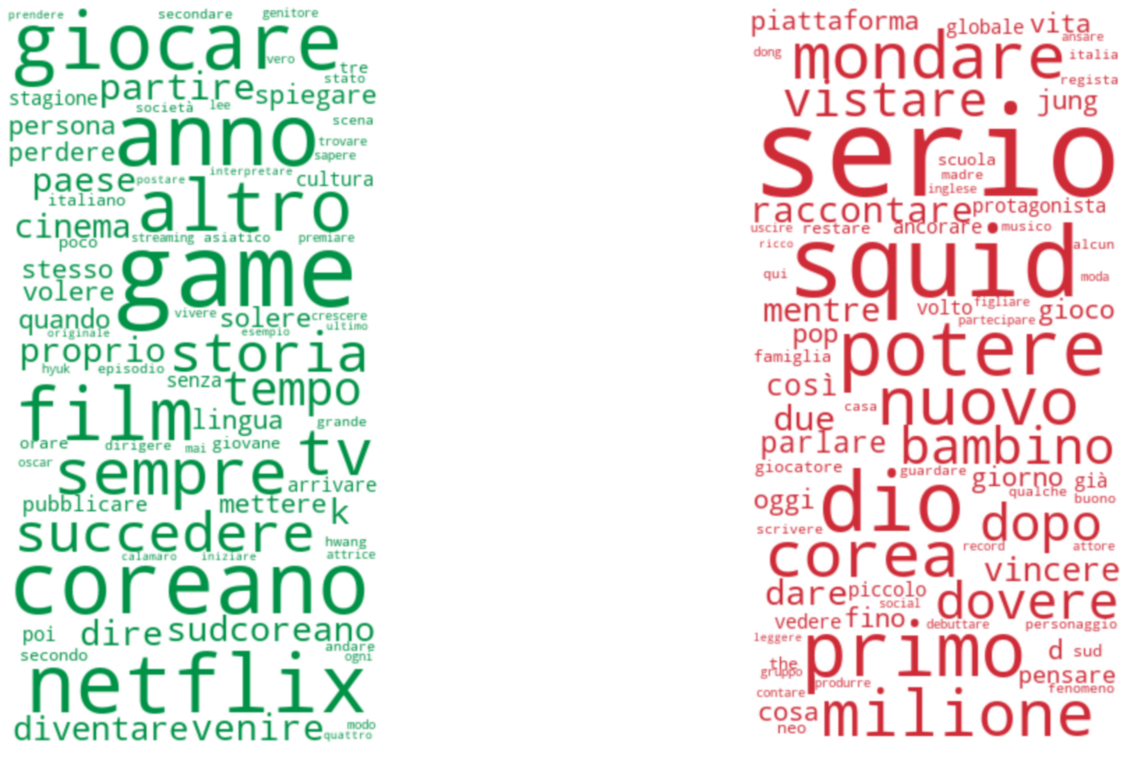

In [26]:
#시각화(워드클라우드)
from numpy.random import randint
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
mask = np.array(Image.open("/content/drive/MyDrive/졸업논문 데이터 분석/flag.png"))

wc = WordCloud(prefer_horizontal=1.0,
               background_color="rgb(255,255,255)", mask=mask, color_func=ImageColorGenerator(mask),
               min_font_size = 2, max_font_size = 100,
               max_words=150, width=2560, height=1707).generate_from_frequencies(counts) 

plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation="bicubic")
plt.axis("off")
plt.savefig("/content/drive/MyDrive/졸업논문 데이터 분석/wordcloud.png", facecolor="#FFFFFF", bbox_inches="tight")
plt.show() 